In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import os

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data_path = ''

/home/fterroso/python/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/home/fterroso/python/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def read_twt_trips_enriched_fn():
    trips_df = pd.read_csv(os.path.join('data', 'trips_enriched.csv'), index_col=0, parse_dates='timestamp_o timestamp_d'.split())
    trips_df['time_duration'] = trips_df['timestamp_d'] - trips_df['timestamp_o']
    trips_df['time_duration_in_h'] = trips_df['time_duration'].apply(lambda x: round(x.seconds/3600,2))
    trips_df = trips_df[trips_df['time_duration_in_h']>0]
    trips_df['speed_km_h'] = trips_df['dist_km'] / trips_df['time_duration_in_h']
    return trips_df

In [3]:
trips_df = read_twt_trips_enriched_fn()

In [4]:
trips_df.head()

,user_id,tw_id_o,timestamp_o,CPRO_o,NPRO_O,CGRUPO_o,NGRUPO_o,POB_GRUPO_o,geom_o,tw_id_d,...,NPRO_d,CGRUPO_d,NGRUPO_d,POB_GRUPO_d,geom_d,time_duration,geom,dist_km,time_duration_in_h,speed_km_h
0,1258006388,1242014584019529728,2020-03-23 09:05:27+00:00,41,Sevilla,084S,Sevilla (SCD Number 4-A),18.048,POINT (241155.7030033822 4141397.433281829),1242190058716835842,...,Sevilla,025S,Alcalá del Río,12.029,POINT (238412.4162063967 4160382.205794079),0 days 11:37:16,LINESTRING (241155.7030033822 4141397.43328182...,19.181950,11.62,1.650770
1,1258006388,1242190058716835842,2020-03-23 20:42:43+00:00,41,Sevilla,025S,Alcalá del Río,12.029,POINT (238412.4162063967 4160382.205794079),1242239109504151564,...,Sevilla,084S,Sevilla (SCD Number 4-A),18.048,POINT (241155.7030033822 4141397.433281829),0 days 03:14:55,LINESTRING (238412.4162063967 4160382.20579407...,19.181950,3.25,5.902138
2,231380112,1241989424113684481,2020-03-23 07:25:28+00:00,17,Girona,25GI,Besalú y otros municipios,5.231,POINT (970453.5231286159 4687892.360277078),1242064620078104578,...,Girona,37GI,Banyoles,19.826,POINT (977549.3669210005 4679816.684196526),0 days 04:58:48,LINESTRING (970453.5231286159 4687892.36027707...,10.750235,4.98,2.158682
3,231380112,1242070404300226574,2020-03-23 12:47:15+00:00,17,Girona,37GI,Banyoles,19.826,POINT (977549.3669210005 4679816.684196526),1242155003655196674,...,Girona,25GI,Besalú y otros municipios,5.231,POINT (970453.5231286159 4687892.360277078),0 days 05:36:10,LINESTRING (977549.3669210005 4679816.68419652...,10.750235,5.60,1.919685
4,1201548956,1242065686043688967,2020-03-23 12:28:30+00:00,8,Barcelona,097B,Parets del Vallès,19.082,POINT (936126.6582087477 4614643.045649199),1242078693377409025,...,Barcelona,030B,Castellterçol y otros municipios,6.165,POINT (921480.9852253482 4635413.947512716),0 days 00:51:41,LINESTRING (936126.6582087477 4614643.04564919...,25.415076,0.86,29.552414


In [5]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342245 entries, 0 to 348288
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   user_id             342245 non-null  int64              
 1   tw_id_o             342245 non-null  int64              
 2   timestamp_o         342245 non-null  datetime64[ns, UTC]
 3   CPRO_o              342245 non-null  int64              
 4   NPRO_O              342245 non-null  object             
 5   CGRUPO_o            342245 non-null  object             
 6   NGRUPO_o            342245 non-null  object             
 7   POB_GRUPO_o         342245 non-null  float64            
 8   geom_o              342245 non-null  object             
 9   tw_id_d             342245 non-null  int64              
 10  timestamp_d         342245 non-null  datetime64[ns, UTC]
 11  CPRO_d              342245 non-null  int64              
 12  NPRO_d          

# Trips distance analysis

In [6]:
trips_df[trips_df['dist_km']<100]['dist_km'].value_counts(bins=40, normalize=True)[:10]

(5.0, 7.5]          0.144602
(2.5, 5.0]          0.122227
(7.5, 10.0]         0.110335
(-0.1006, 2.5]      0.103764
(10.0, 12.5]        0.077636
(12.5, 14.999]      0.056302
(14.999, 17.499]    0.050302
(17.499, 19.999]    0.040482
(19.999, 22.499]    0.035338
(22.499, 24.999]    0.029898
Name: dist_km, dtype: float64

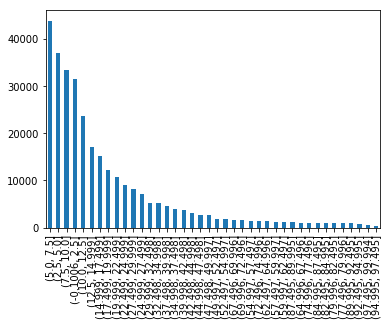

In [7]:
trips_df[trips_df['dist_km']<100]['dist_km'].value_counts(bins=40).plot(kind='bar');

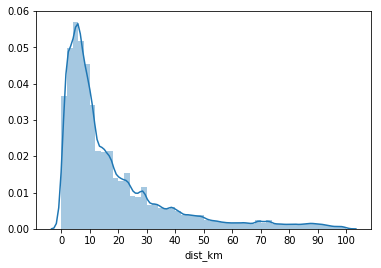

In [8]:
ax= sns.distplot(trips_df[trips_df['dist_km']<100]['dist_km']);
ax.set_xticks(np.arange(0,101,10)); 


# Time length analysis

In [9]:
trips_df[trips_df['time_duration_in_h']<100]['time_duration_in_h'].value_counts(bins=40, normalize=True)[:10]

(-0.015, 0.61]    0.272068
(0.61, 1.21]      0.087046
(1.21, 1.809]     0.060141
(1.809, 2.409]    0.053576
(2.409, 3.009]    0.044106
(3.009, 3.608]    0.037526
(3.608, 4.208]    0.032754
(4.208, 4.808]    0.029309
(4.808, 5.408]    0.027436
(5.408, 6.008]    0.024456
Name: time_duration_in_h, dtype: float64

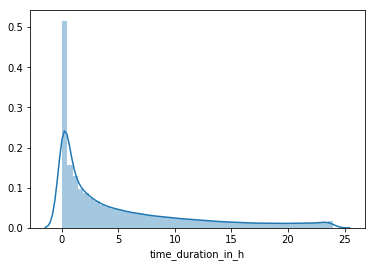

In [10]:
ax= sns.distplot(trips_df['time_duration_in_h']);
#ax.set_xticks(np.arange(0,13)); 

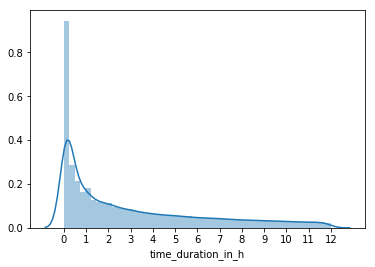

In [11]:
ax= sns.distplot(trips_df[trips_df['time_duration_in_h']<=12]['time_duration_in_h']);
ax.set_xticks(np.arange(0,13)); 

# Speed analysis

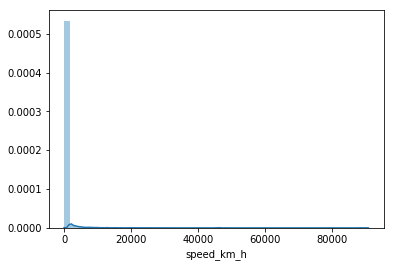

In [12]:
sns.distplot(trips_df['speed_km_h']);

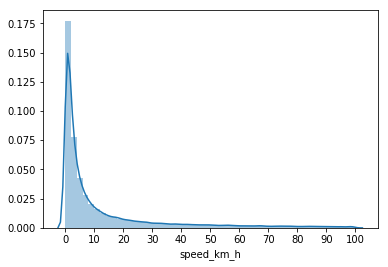

In [13]:
ax= sns.distplot(trips_df[trips_df['speed_km_h']<=100]['speed_km_h']);
ax.set_xticks(np.arange(0,101,10)); 